In [10]:
import numpy as np
import pandas as ps
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load dataset
fmnist = tf.keras.datasets.fashion_mnist

# Split data
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizing pixel values (to a range between 0-1)
train_images = train_images/255.0
test_images = test_images/255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# Check train images shape
train_images.shape

(60000, 28, 28)

Label: 8
Image Array: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

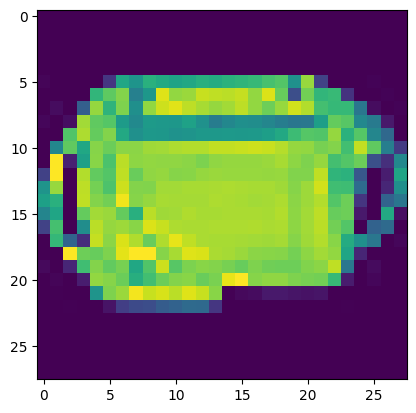

In [13]:
# Visualize image you want to see

index = 105
np.set_printoptions(linewidth = 320)
print(f"Label: {train_labels[index]}")
print(f"Image Array: {train_images[index]}")
plt.imshow(train_images[index])


In [23]:
# Define model

model = tf.keras.models.Sequential([
        # Convolutions and pooling
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = (28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = "relu", input_shape = (28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),

        # Flatten output
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,402 (982.04 KB)

 Trainable params: 251,402 (982.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# Add Erly Stopping as Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",  # the metric to track
    patience = 3,          # number of epoch before stopping
    restore_best_weights = True
)

# Train model
model.fit(train_images, train_labels,
          epochs = 10,
          batch_size = 32,
          validation_data = (test_images, test_labels),
          callbacks = [early_stopping]
          )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.7528 - loss: 0.6539 - val_accuracy: 0.8370 - val_loss: 0.4385
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 44ms/step - accuracy: 0.8608 - loss: 0.3842 - val_accuracy: 0.8628 - val_loss: 0.3813
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 45ms/step - accuracy: 0.8701 - loss: 0.3543 - val_accuracy: 0.8602 - val_loss: 0.3661
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/step - accuracy: 0.8755 - loss: 0.3441 - val_accuracy: 0.8611 - val_loss: 0.3922
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 45ms/step - accuracy: 0.8777 - loss: 0.3401 - val_accuracy: 0.8685 - val_loss: 0.3674
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.8802 - loss: 0.3289 - val_accuracy: 0.8689 - val_loss: 0.3626
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.8794 - loss: 0.3309 - val_accuracy: 0.8694 - val_loss: 0.3913
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 45ms/step - accuracy: 0

In [26]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8648 - loss: 0.3694


[0.36258751153945923, 0.8689000010490417]